     CT1  CT2  Port  Total I Grade
0     95   92    88     92       A
1     53   68    38     56       C
2     63   54    62     59       C
3     91   57    74     74       B
4     98   86    92     92       A
..   ...  ...   ...    ...     ...
218   81   76    71     77       B
219   49   68    74     61       C
220   40   35    58     41       D
221   81   76    85     80       A
222   53   38    44     45       D

[223 rows x 5 columns]
93


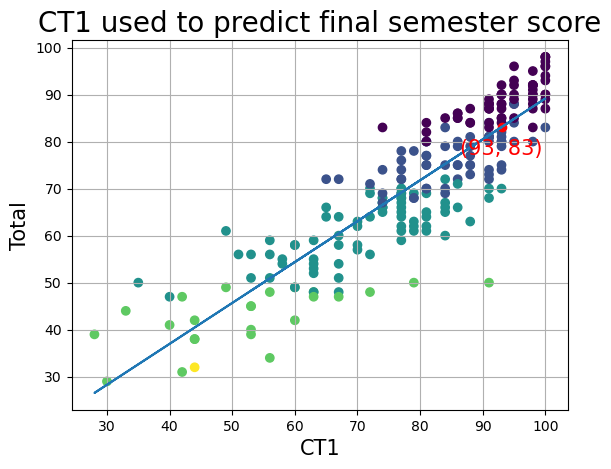

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import random

# Load data from an Excel file into a DataFrame
df = pd.read_excel('Year7Data - 2023.xlsx', sheet_name='Sheet1')

# Print the loaded data
print(df)

# Extract relevant columns from the DataFrame
classes = []
grades = df.loc[:, "I Grade"]
x1 = df.loc[:, "CT1"]
y = df.loc[:, "Total"]

# Convert letter grades to numerical classes for coloring
for n in range(0, len(y)):
    grade = grades[n]
    if grade == "A":
        classes.append(0)  # Purple
    elif grade == "B":
        classes.append(1)  # Dark blue
    elif grade == "C":
        classes.append(2)  # Aquamarine
    elif grade == "D":
        classes.append(3)  # Green
    else:
        classes.append(4)  # Yellow

# Perform linear regression to find the relationship between x1 (CT1) and y (Total)
slope, intercept, r, p, std_err = stats.linregress(x1, y)

# Define a linear function for prediction
def myfunc(x):
    return slope * x + intercept

# Create a list of predicted y values using the linear function
mymodel = list(map(myfunc, x1))

# Generate a new random x value for prediction
new_x = random.randint(min(x1), max(x1))
print(new_x)
# Calculate the corresponding y value using the linear function
new_y = myfunc(new_x)
roundY = round(new_y)

# Create a scatter plot of x1 vs. y, color-coded by classes
plt.scatter(x1, y, c=classes)
# Plot the new prediction point in red
plt.scatter(new_x, new_y, c='red')
# Annotate the new prediction point with its coordinates
plt.annotate(f'({new_x}, {roundY})', (new_x, new_y), textcoords="offset points", xytext=(0, -20), ha='center', c='red', fontsize=15)
# Plot the linear regression line
plt.plot(x1, mymodel)
# Add labels and title to the plot
plt.xlabel('CT1', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.title('CT1 used to predict final semester score', fontsize=20)
# Display a grid and save the plot as an image
plt.grid()
plt.savefig('linearRegression.png')
# Display the plot
plt.show()